In [52]:
import numpy
import math
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import wilcoxon

In [53]:
#Read in day wise AQI and calculate mean monthly AQI values
data = pandas.read_csv('../Aim 3 and 4/prominent.csv')
cities = ['Chennai']
month=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

In [54]:
for city in cities:
    print(city)
    temp = data.loc[data['City'] == city]
    if(not temp.empty):
        train = pandas.DataFrame(columns=['Year','Month','Mean','Pollutant'])
        test = pandas.DataFrame(columns=['Year','Month','Mean','Pollutant'])
        for i in range(2016,2020):
            for j in range(1,13):
                count=0
                aqisum=0
                prominent = {}
                for k in range(1,32):
                    date = str(i)+'-'+str("%02d" % j)+'-'+str("%02d" % k)
                    record = temp.loc[temp['Date'] == date]
                    if(not record.empty):
                        if(not math.isnan(record['AQI'])):
                            aqisum = aqisum + record.iloc[0]['AQI']
                            count = count + 1
                            pollutants = record['AQI_label'].to_string()
                            pollutants = pollutants.replace('\'','')
                            pollutants = pollutants.split('(', 1)[-1]
                            pollutants = pollutants.split(')', 1)[0]
                            for pollutant in pollutants.split(','):
                                if(str(pollutant) in prominent):
                                    prominent[str(pollutant)]=prominent[pollutant]+1
                                
                                elif(str(pollutant) != ''):
                                    prominent[str(pollutant)]=0
                                
                            
                        
                    
                
                if(prominent):
                    mark = max(prominent, key=prominent.get)

                else:
                    mark = ''
                
                if(count <= 15):
                    mean=float('NaN')
                
                else:
                    mean=float(aqisum/count)
                
                if(i == 2019):
                    test = test.append({'Year': i,'Month': month[j-1], 'Mean': mean, 'Pollutant':mark},ignore_index=True)
                
                else:
                    train = train.append({'Year': i,'Month': month[j-1], 'Mean': mean, 'Pollutant':mark},ignore_index=True)
                
            
        
    


Chennai


<AxesSubplot:>

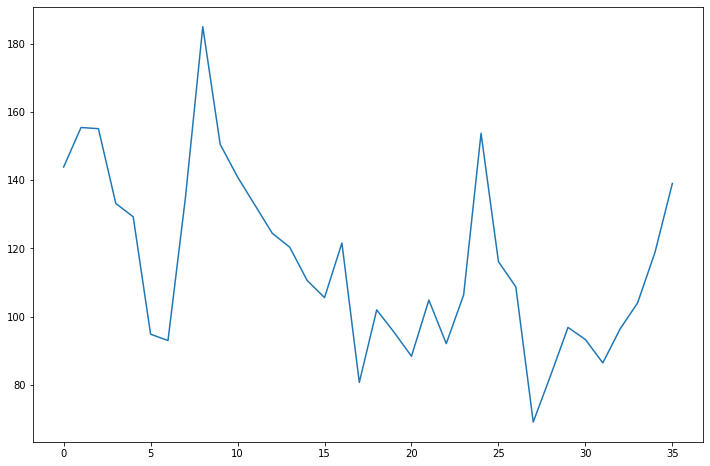

In [55]:
#Interpolate AQI data over 2016, 2017 and 2018
train['Mean'] = train['Mean'].interpolate()
test['Mean'] = test['Mean'].interpolate()
train['Mean'].plot(figsize=(12,8))

In [56]:
train

,Year,Month,Mean,Pollutant
0,2016,JAN,143.838710,PM25_SubIndex
1,2016,FEB,155.413793,PM25_SubIndex
2,2016,MAR,155.064516,PM25_SubIndex
3,2016,APR,133.166667,PM25_SubIndex
4,2016,MAY,129.258065,PM25_SubIndex
5,2016,JUN,94.882353,CO_SubIndex
6,2016,JUL,93.033333,CO_SubIndex
7,2016,AUG,134.741935,PM25_SubIndex
8,2016,SEP,184.933333,CO_SubIndex
9,2016,OCT,150.500000,PM25_SubIndex


Text(0, 0.5, 'AQI')

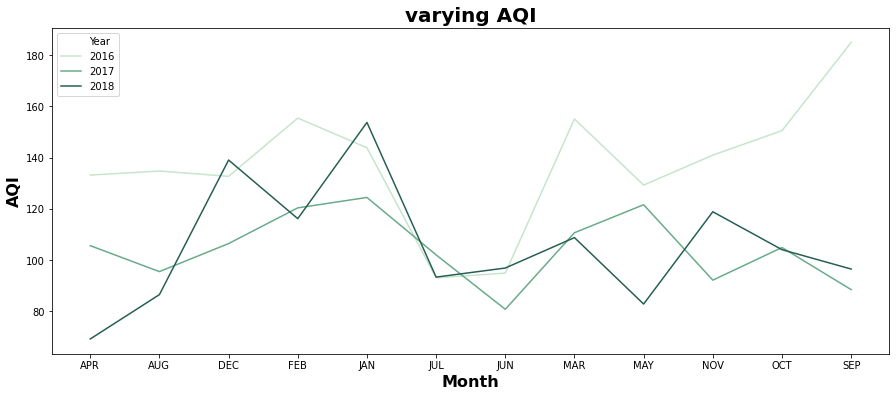

In [57]:
#Plot the seasonal plot for AQI across 2016, 2017 and 2018
variable = 'salinitySurface'
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:2.5,-.2,dark=.3", 3)
sns.lineplot(train['Month'], train['Mean'], hue=train['Year'], palette=palette)
ax.set_title('varying AQI', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('AQI', fontsize = 16, fontdict=dict(weight='bold'))

# Plot of year-wise and Month-wise box plot to visualize trend and seasonality

Text(0, 0.5, 'AQI')

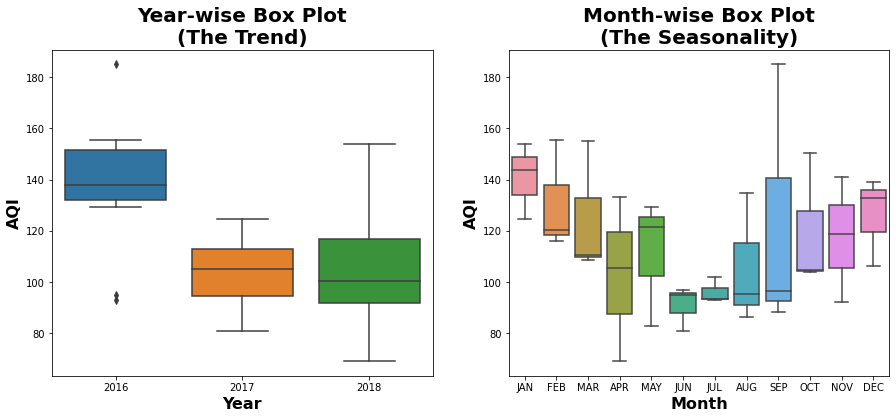

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(train['Year'], train['Mean'], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('AQI', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(train['Month'], train['Mean'], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('AQI', fontsize = 16, fontdict=dict(weight='bold'))

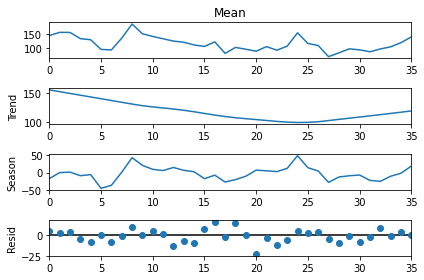

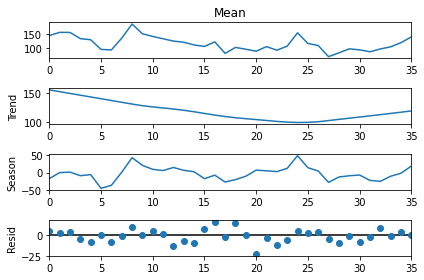

In [59]:
#Decompose time series data into trend, seasonality and residual
stl = STL(train['Mean'], period=12)
res = stl.fit()
#stl2 = STL(res.resid, period=12)
#res2 = stl2.fit()
res.plot()

In [60]:
signi = adfuller(train['Mean'])
print('ADF Statistic: %f' % signi[0])
print('p-value: %f' % signi[1])
print('Critical Values:')
for key, value in signi[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.793462
p-value: 0.059214
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


In [61]:
train
li_val = list(train['Mean'])

# Preprocessing for LSTM Model

In [62]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import tensorflow as tf

In [63]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		end_ix = i + n_features
		if end_ix > len(timeseries_data)-1:
			break
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [64]:
#input sequence
timeseries_data = li_val
#number of time steps
n_steps = 2
# splitting
X, y = prepare_data(timeseries_data, n_steps)

In [65]:
print(X),print(y)

[[143.83870968 155.4137931 ]
 [155.4137931  155.06451613]
 [155.06451613 133.16666667]
 [133.16666667 129.25806452]
 [129.25806452  94.88235294]
 [ 94.88235294  93.03333333]
 [ 93.03333333 134.74193548]
 [134.74193548 184.93333333]
 [184.93333333 150.5       ]
 [150.5        140.93333333]
 [140.93333333 132.67634409]
 [132.67634409 124.41935484]
 [124.41935484 120.35714286]
 [120.35714286 110.64516129]
 [110.64516129 105.6       ]
 [105.6        121.58064516]
 [121.58064516  80.75862069]
 [ 80.75862069 102.        ]
 [102.          95.46428571]
 [ 95.46428571  88.43333333]
 [ 88.43333333 104.87096774]
 [104.87096774  92.13333333]
 [ 92.13333333 106.41935484]
 [106.41935484 153.70967742]
 [153.70967742 116.14285714]
 [116.14285714 108.74193548]
 [108.74193548  69.16666667]
 [ 69.16666667  82.80645161]
 [ 82.80645161  96.86666667]
 [ 96.86666667  93.32258065]
 [ 93.32258065  86.48387097]
 [ 86.48387097  96.46666667]
 [ 96.46666667 104.03225806]
 [104.03225806 118.83333333]]
[155.06451613

(None, None)

In [66]:
X.shape

(34, 2)

In [67]:
n_features = 1
# reshape from (samples, timesteps) into (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], n_features))

# LSTM Model

In [68]:
np.random.seed(20)
tf.random.set_seed(770)
#model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1200, verbose=1)

Epoch 1/1200
2/2 [==============================] - 0s 6ms/step - loss: 13996.5547
Epoch 2/1200
2/2 [==============================] - 0s 5ms/step - loss: 13295.6357
Epoch 3/1200
2/2 [==============================] - 0s 7ms/step - loss: 12649.6367
Epoch 4/1200
2/2 [==============================] - 0s 8ms/step - loss: 11994.8145
Epoch 5/1200
2/2 [==============================] - 0s 9ms/step - loss: 11306.6963
Epoch 6/1200
2/2 [==============================] - 0s 7ms/step - loss: 10516.0225
Epoch 7/1200
2/2 [==============================] - 0s 9ms/step - loss: 9546.4590
Epoch 8/1200
2/2 [==============================] - 0s 7ms/step - loss: 8417.9326
Epoch 9/1200
2/2 [==============================] - 0s 8ms/step - loss: 7035.7549
Epoch 10/1200
2/2 [==============================] - 0s 7ms/step - loss: 5460.7749
Epoch 11/1200
2/2 [==============================] - 0s 7ms/step - loss: 3783.4858
Epoch 12/1200
2/2 [==============================] - 0s 9ms/step - loss: 2280.4463
Epoch 1

2/2 [==============================] - 0s 11ms/step - loss: 386.4644
Epoch 101/1200
2/2 [==============================] - 0s 5ms/step - loss: 391.2678
Epoch 102/1200
2/2 [==============================] - 0s 6ms/step - loss: 400.6054
Epoch 103/1200
2/2 [==============================] - 0s 7ms/step - loss: 401.0321
Epoch 104/1200
2/2 [==============================] - 0s 5ms/step - loss: 397.8361
Epoch 105/1200
2/2 [==============================] - 0s 11ms/step - loss: 390.0448
Epoch 106/1200
2/2 [==============================] - 0s 8ms/step - loss: 388.1042
Epoch 107/1200
2/2 [==============================] - 0s 8ms/step - loss: 423.2767
Epoch 108/1200
2/2 [==============================] - 0s 12ms/step - loss: 449.4266
Epoch 109/1200
2/2 [==============================] - 0s 7ms/step - loss: 442.0697
Epoch 110/1200
2/2 [==============================] - 0s 11ms/step - loss: 419.5712
Epoch 111/1200
2/2 [==============================] - 0s 9ms/step - loss: 401.2397
Epoch 112/1200


2/2 [==============================] - 0s 7ms/step - loss: 405.6576
Epoch 199/1200
2/2 [==============================] - 0s 6ms/step - loss: 400.7241
Epoch 200/1200
2/2 [==============================] - 0s 9ms/step - loss: 379.8859
Epoch 201/1200
2/2 [==============================] - 0s 9ms/step - loss: 382.7106
Epoch 202/1200
2/2 [==============================] - 0s 7ms/step - loss: 399.7608
Epoch 203/1200
2/2 [==============================] - 0s 6ms/step - loss: 398.9572
Epoch 204/1200
2/2 [==============================] - 0s 12ms/step - loss: 392.4872
Epoch 205/1200
2/2 [==============================] - 0s 6ms/step - loss: 393.0447
Epoch 206/1200
2/2 [==============================] - 0s 9ms/step - loss: 406.7013
Epoch 207/1200
2/2 [==============================] - 0s 7ms/step - loss: 413.0950
Epoch 208/1200
2/2 [==============================] - 0s 8ms/step - loss: 389.4122
Epoch 209/1200
2/2 [==============================] - 0s 10ms/step - loss: 376.4952
Epoch 210/1200
2/

2/2 [==============================] - 0s 10ms/step - loss: 397.3896
Epoch 297/1200
2/2 [==============================] - 0s 7ms/step - loss: 393.1913
Epoch 298/1200
2/2 [==============================] - 0s 8ms/step - loss: 383.1676
Epoch 299/1200
2/2 [==============================] - 0s 8ms/step - loss: 386.6599
Epoch 300/1200
2/2 [==============================] - 0s 8ms/step - loss: 411.0809
Epoch 301/1200
2/2 [==============================] - 0s 8ms/step - loss: 417.1715
Epoch 302/1200
2/2 [==============================] - 0s 7ms/step - loss: 387.4107
Epoch 303/1200
2/2 [==============================] - 0s 7ms/step - loss: 385.4906
Epoch 304/1200
2/2 [==============================] - 0s 7ms/step - loss: 394.1910
Epoch 305/1200
2/2 [==============================] - 0s 6ms/step - loss: 380.0195
Epoch 306/1200
2/2 [==============================] - 0s 7ms/step - loss: 379.3754
Epoch 307/1200
2/2 [==============================] - 0s 7ms/step - loss: 421.3506
Epoch 308/1200
2/2

2/2 [==============================] - 0s 6ms/step - loss: 454.5001
Epoch 395/1200
2/2 [==============================] - 0s 7ms/step - loss: 429.0278
Epoch 396/1200
2/2 [==============================] - 0s 6ms/step - loss: 404.5100
Epoch 397/1200
2/2 [==============================] - 0s 5ms/step - loss: 389.9000
Epoch 398/1200
2/2 [==============================] - 0s 5ms/step - loss: 385.8821
Epoch 399/1200
2/2 [==============================] - 0s 6ms/step - loss: 383.4508
Epoch 400/1200
2/2 [==============================] - 0s 11ms/step - loss: 381.4435
Epoch 401/1200
2/2 [==============================] - 0s 8ms/step - loss: 385.6549
Epoch 402/1200
2/2 [==============================] - 0s 7ms/step - loss: 392.4942
Epoch 403/1200
2/2 [==============================] - 0s 7ms/step - loss: 389.4629
Epoch 404/1200
2/2 [==============================] - 0s 7ms/step - loss: 380.4290
Epoch 405/1200
2/2 [==============================] - 0s 7ms/step - loss: 374.7660
Epoch 406/1200
2/2

2/2 [==============================] - 0s 7ms/step - loss: 367.8227
Epoch 493/1200
2/2 [==============================] - 0s 9ms/step - loss: 378.3119
Epoch 494/1200
2/2 [==============================] - 0s 8ms/step - loss: 447.1045
Epoch 495/1200
2/2 [==============================] - 0s 6ms/step - loss: 455.8413
Epoch 496/1200
2/2 [==============================] - 0s 8ms/step - loss: 413.2830
Epoch 497/1200
2/2 [==============================] - 0s 8ms/step - loss: 386.4155
Epoch 498/1200
2/2 [==============================] - 0s 7ms/step - loss: 366.6256
Epoch 499/1200
2/2 [==============================] - 0s 10ms/step - loss: 359.2032
Epoch 500/1200
2/2 [==============================] - 0s 7ms/step - loss: 404.1594
Epoch 501/1200
2/2 [==============================] - 0s 6ms/step - loss: 444.8206
Epoch 502/1200
2/2 [==============================] - 0s 8ms/step - loss: 428.3669
Epoch 503/1200
2/2 [==============================] - 0s 7ms/step - loss: 382.1541
Epoch 504/1200
2/2

2/2 [==============================] - 0s 6ms/step - loss: 394.6114
Epoch 591/1200
2/2 [==============================] - 0s 9ms/step - loss: 390.5052
Epoch 592/1200
2/2 [==============================] - 0s 6ms/step - loss: 383.0797
Epoch 593/1200
2/2 [==============================] - 0s 8ms/step - loss: 371.9242
Epoch 594/1200
2/2 [==============================] - 0s 9ms/step - loss: 374.9861
Epoch 595/1200
2/2 [==============================] - 0s 7ms/step - loss: 392.8008
Epoch 596/1200
2/2 [==============================] - 0s 8ms/step - loss: 406.3398
Epoch 597/1200
2/2 [==============================] - 0s 7ms/step - loss: 405.4574
Epoch 598/1200
2/2 [==============================] - 0s 5ms/step - loss: 398.7241
Epoch 599/1200
2/2 [==============================] - 0s 8ms/step - loss: 395.2545
Epoch 600/1200
2/2 [==============================] - 0s 6ms/step - loss: 391.7174
Epoch 601/1200
2/2 [==============================] - 0s 7ms/step - loss: 387.6516
Epoch 602/1200
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 422.2054
Epoch 689/1200
2/2 [==============================] - 0s 7ms/step - loss: 435.2064
Epoch 690/1200
2/2 [==============================] - 0s 10ms/step - loss: 416.6960
Epoch 691/1200
2/2 [==============================] - 0s 8ms/step - loss: 422.1244
Epoch 692/1200
2/2 [==============================] - 0s 7ms/step - loss: 402.1510
Epoch 693/1200
2/2 [==============================] - 0s 6ms/step - loss: 356.6044
Epoch 694/1200
2/2 [==============================] - 0s 8ms/step - loss: 352.3797
Epoch 695/1200
2/2 [==============================] - 0s 6ms/step - loss: 383.0376
Epoch 696/1200
2/2 [==============================] - 0s 7ms/step - loss: 438.6079
Epoch 697/1200
2/2 [==============================] - 0s 7ms/step - loss: 507.8595
Epoch 698/1200
2/2 [==============================] - 0s 7ms/step - loss: 510.9989
Epoch 699/1200
2/2 [==============================] - 0s 7ms/step - loss: 448.6964
Epoch 700/1200
2/2

2/2 [==============================] - 0s 8ms/step - loss: 351.4423
Epoch 787/1200
2/2 [==============================] - 0s 5ms/step - loss: 369.0056
Epoch 788/1200
2/2 [==============================] - 0s 13ms/step - loss: 415.9070
Epoch 789/1200
2/2 [==============================] - 0s 7ms/step - loss: 438.1355
Epoch 790/1200
2/2 [==============================] - 0s 7ms/step - loss: 406.1692
Epoch 791/1200
2/2 [==============================] - 0s 10ms/step - loss: 369.4880
Epoch 792/1200
2/2 [==============================] - 0s 6ms/step - loss: 354.7995
Epoch 793/1200
2/2 [==============================] - 0s 7ms/step - loss: 357.3674
Epoch 794/1200
2/2 [==============================] - 0s 7ms/step - loss: 361.8271
Epoch 795/1200
2/2 [==============================] - 0s 7ms/step - loss: 358.6917
Epoch 796/1200
2/2 [==============================] - 0s 8ms/step - loss: 354.5570
Epoch 797/1200
2/2 [==============================] - 0s 7ms/step - loss: 369.0515
Epoch 798/1200
2/

2/2 [==============================] - 0s 6ms/step - loss: 332.9340
Epoch 885/1200
2/2 [==============================] - 0s 7ms/step - loss: 338.7038
Epoch 886/1200
2/2 [==============================] - 0s 4ms/step - loss: 363.3282
Epoch 887/1200
2/2 [==============================] - 0s 6ms/step - loss: 441.1182
Epoch 888/1200
2/2 [==============================] - 0s 6ms/step - loss: 381.5318
Epoch 889/1200
2/2 [==============================] - 0s 7ms/step - loss: 386.3754
Epoch 890/1200
2/2 [==============================] - 0s 5ms/step - loss: 491.5472
Epoch 891/1200
2/2 [==============================] - 0s 5ms/step - loss: 521.5638
Epoch 892/1200
2/2 [==============================] - 0s 6ms/step - loss: 484.8090
Epoch 893/1200
2/2 [==============================] - 0s 5ms/step - loss: 442.0316
Epoch 894/1200
2/2 [==============================] - 0s 5ms/step - loss: 409.8489
Epoch 895/1200
2/2 [==============================] - 0s 5ms/step - loss: 403.5268
Epoch 896/1200
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 334.2685
Epoch 983/1200
2/2 [==============================] - 0s 6ms/step - loss: 335.9320
Epoch 984/1200
2/2 [==============================] - 0s 7ms/step - loss: 333.7579
Epoch 985/1200
2/2 [==============================] - 0s 7ms/step - loss: 332.7218
Epoch 986/1200
2/2 [==============================] - 0s 6ms/step - loss: 334.7564
Epoch 987/1200
2/2 [==============================] - 0s 9ms/step - loss: 334.6942
Epoch 988/1200
2/2 [==============================] - 0s 8ms/step - loss: 332.7101
Epoch 989/1200
2/2 [==============================] - 0s 6ms/step - loss: 330.3617
Epoch 990/1200
2/2 [==============================] - 0s 8ms/step - loss: 342.0869
Epoch 991/1200
2/2 [==============================] - 0s 6ms/step - loss: 334.2881
Epoch 992/1200
2/2 [==============================] - 0s 6ms/step - loss: 335.1589
Epoch 993/1200
2/2 [==============================] - 0s 8ms/step - loss: 329.7756
Epoch 994/1200
2/2 

2/2 [==============================] - 0s 5ms/step - loss: 374.2525
Epoch 1080/1200
2/2 [==============================] - 0s 5ms/step - loss: 398.1628
Epoch 1081/1200
2/2 [==============================] - 0s 8ms/step - loss: 421.5346
Epoch 1082/1200
2/2 [==============================] - 0s 5ms/step - loss: 411.3494
Epoch 1083/1200
2/2 [==============================] - 0s 5ms/step - loss: 336.5481
Epoch 1084/1200
2/2 [==============================] - 0s 5ms/step - loss: 332.7095
Epoch 1085/1200
2/2 [==============================] - 0s 5ms/step - loss: 462.6225
Epoch 1086/1200
2/2 [==============================] - 0s 6ms/step - loss: 557.8610
Epoch 1087/1200
2/2 [==============================] - 0s 7ms/step - loss: 512.4554
Epoch 1088/1200
2/2 [==============================] - 0s 6ms/step - loss: 399.0653
Epoch 1089/1200
2/2 [==============================] - 0s 5ms/step - loss: 362.8320
Epoch 1090/1200
2/2 [==============================] - 0s 5ms/step - loss: 404.7256
Epoch 10

2/2 [==============================] - 0s 7ms/step - loss: 317.7403
Epoch 1177/1200
2/2 [==============================] - 0s 12ms/step - loss: 338.7494
Epoch 1178/1200
2/2 [==============================] - 0s 7ms/step - loss: 353.8209
Epoch 1179/1200
2/2 [==============================] - 0s 5ms/step - loss: 359.8765
Epoch 1180/1200
2/2 [==============================] - 0s 7ms/step - loss: 363.5901
Epoch 1181/1200
2/2 [==============================] - 0s 5ms/step - loss: 363.2396
Epoch 1182/1200
2/2 [==============================] - 0s 6ms/step - loss: 357.8381
Epoch 1183/1200
2/2 [==============================] - 0s 4ms/step - loss: 342.7369
Epoch 1184/1200
2/2 [==============================] - 0s 4ms/step - loss: 328.3801
Epoch 1185/1200
2/2 [==============================] - 0s 4ms/step - loss: 323.1176
Epoch 1186/1200
2/2 [==============================] - 0s 6ms/step - loss: 317.7852
Epoch 1187/1200
2/2 [==============================] - 0s 7ms/step - loss: 310.3149
Epoch 1

# Prediction for next 24 months

In [69]:
x_input = np.array([
  118.83333333333333,
 139.03225806451613])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<24):
    
    if(len(temp_input)>2):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[121.09802]
1 day input [139.03225806 121.09802246]
1 day output [[110.42128]]
2 day input [121.09802 110.42128]
2 day output [[101.01648]]
3 day input [110.42128 101.01648]
3 day output [[97.18143]]
4 day input [101.01648  97.18143]
4 day output [[100.9749]]
5 day input [ 97.18143 100.9749 ]
5 day output [[106.54147]]
6 day input [100.9749  106.54147]
6 day output [[105.65383]]
7 day input [106.54147 105.65383]
7 day output [[100.79813]]
8 day input [105.65383 100.79813]
8 day output [[99.01439]]
9 day input [100.79813  99.01439]
9 day output [[102.00884]]
10 day input [ 99.01439 102.00884]
10 day output [[105.2166]]
11 day input [102.00884 105.2166 ]
11 day output [[103.9433]]
12 day input [105.2166 103.9433]
12 day output [[100.75607]]
13 day input [103.9433  100.75607]
13 day output [[100.14577]]
14 day input [100.75607 100.14577]
14 day output [[102.57826]]
15 day input [100.14577 102.57826]
15 day output [[104.36415]]
16 day input [102.57826 104.36415]
16 day output [[102.9895]]


# RMSE for 2019 Data

In [70]:
lst_2019 = [x for x in lst_output[0:12]]
error = mean_squared_error(list(test['Mean']), lst_2019)
print('Persistence MSE: %.3f' % math.sqrt(error))

Persistence MSE: 11.840


In [71]:
a = list(test['Mean'])

In [72]:
lst_2020 = [x for x in lst_output[12:24]]

In [73]:
import pandas as pd
list_avg_AQI_2020_chennai = []
df_cityday = pd.read_csv('../Aim 3 and 4/prominent.csv')
df_chennai = df_cityday[df_cityday['City']=='Chennai']

In [74]:
df_chennai_2020_jan = df_chennai[(df_chennai['Date']>'2020-01-01') & (df_chennai['Date']<'2020-01-31')]


df_chennai_2020_jan = df_chennai_2020_jan[df_chennai_2020_jan['AQI'].notna()]


list_avg_AQI_2020_chennai.append(df_chennai_2020_jan['AQI'].mean())

df_chennai_2020_feb = df_chennai[(df_chennai['Date']>'2020-02-01') & (df_chennai['Date']<'2020-02-28')]


df_chennai_2020_feb = df_chennai_2020_feb[df_chennai_2020_feb['AQI'].notna()]


list_avg_AQI_2020_chennai.append(df_chennai_2020_feb['AQI'].mean())


df_chennai_2020_mar = df_chennai[(df_chennai['Date']>'2020-03-01') & (df_chennai['Date']<'2020-03-31')]


df_chennai_2020_mar = df_chennai_2020_mar[df_chennai_2020_mar['AQI'].notna()]


list_avg_AQI_2020_chennai.append(df_chennai_2020_mar['AQI'].mean())

df_chennai_2020_apr = df_chennai[(df_chennai['Date']>'2020-04-01') & (df_chennai['Date']<'2020-04-30')]


df_chennai_2020_apr = df_chennai_2020_apr[df_chennai_2020_apr['AQI'].notna()]


list_avg_AQI_2020_chennai.append(df_chennai_2020_apr['AQI'].mean())

df_chennai_2020_may = df_chennai[(df_chennai['Date']>'2020-05-01') & (df_chennai['Date']<'2020-05-31')]


df_chennai_2020_may = df_chennai_2020_may[df_chennai_2020_may['AQI'].notna()]


list_avg_AQI_2020_chennai.append(df_chennai_2020_may['AQI'].mean())

df_chennai_2020_jun = df_chennai[(df_chennai['Date']>'2020-06-01') & (df_chennai['Date']<'2020-06-30')]


df_chennai_2020_jun = df_chennai_2020_jun[df_chennai_2020_jun['AQI'].notna()]


list_avg_AQI_2020_chennai.append(df_chennai_2020_jun['AQI'].mean())

In [75]:
list_dates = ['JAN','FEB','MAR','APR','MAY','JUN']
lst_2020_graph = [x for x in lst_2020[0:6]]
lst_2020_original = [x for x in list_avg_AQI_2020_chennai[0:6]]

# Visualizing The Output

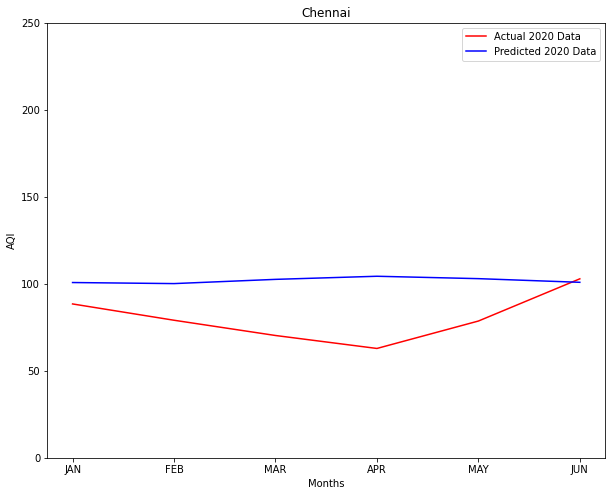

In [77]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (10,8))


plt.plot(list_dates, lst_2020_original ,  color='red', label='Actual 2020 Data') 
plt.plot(list_dates, lst_2020_graph,  color='blue', label='Predicted 2020 Data') 
plt.ylim(0,250)
plt.xlabel('Months')  
plt.ylabel('AQI')
plt.title('Chennai')
plt.legend()
plt.show() 

In [78]:
stat, p = wilcoxon(lst_2020_graph, lst_2020_original)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1.000, p=0.062
